<a href="https://colab.research.google.com/github/pirumba/deeplearning/blob/main/Chest_opacity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import PIL.Image
from tensorflow.keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Connecting Google colab to Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Data Set

In [3]:
dataset1 = "/content/drive/MyDrive/deep_learning_project1/dataset1/known_images"
train_ds = tf.keras.utils.image_dataset_from_directory(dataset1, validation_split=0.2, subset="training", seed=123, image_size=(100,100),batch_size=32)


Found 715 files belonging to 2 classes.
Using 572 files for training.


Explore the data

Verifying Data class names

In [4]:
class_names = train_ds.class_names
print(class_names)

['normal', 'sick']


Verifying images to be used for validation

In [5]:
valid_ds = tf.keras.utils.image_dataset_from_directory(dataset1, validation_split=0.2,subset="validation", seed=123, image_size=(100, 100), batch_size=32)


Found 715 files belonging to 2 classes.
Using 143 files for validation.


viewing sample images of the train data

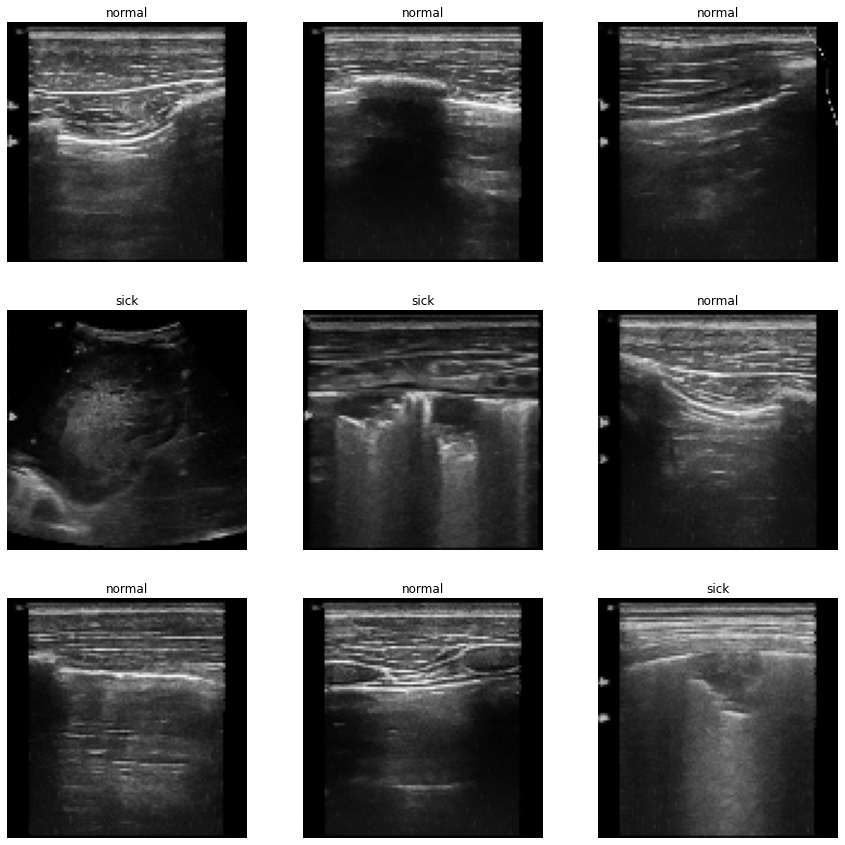

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for images, lebels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[lebels[i]])
    plt.axis("off")

checking the shape of the images

In [7]:
for image_batch, lebels_batch in train_ds:
  print(image_batch.shape)
  print(lebels_batch.shape)
  break

(32, 100, 100, 3)
(32,)


Preprocess the data

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

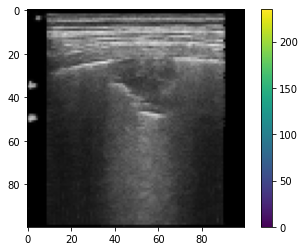

In [8]:
import matplotlib.pyplot as plt
plt.figure(0)
plt.imshow(images[i].numpy().astype("uint8"))
#plt.imshow(train_ds[0])
plt.colorbar()
plt.grid(False)
plt.show()

Autotunning the training dataset and validation dataset

In [9]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
valid_ds = valid_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)


Normalizing datasets

In [10]:
normalization_layer = layers.Rescaling(1./255)

In [11]:
normalized_train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, lebels_batch = next(iter(normalized_train_ds))
first_image = image_batch[3]
print(np.min(first_image), np.max(first_image))

0.0 0.95184326


In [12]:
normalized_valid_ds = valid_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, lebels_batch = next(iter(normalized_valid_ds))
first_image = image_batch[2]
print(np.min(first_image), np.max(first_image))

0.0 0.92303336


Creating the Model

In [13]:
num_classes = len(class_names)
model = tf.keras.Sequential([
    layers.Rescaling(1./255, input_shape=(100, 100, 3)),
    layers.Conv2D(16, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(num_classes)
])

compile

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        1

Epoching

In [18]:
epochs=15
history = model.fit(
normalized_valid_ds, 
validation_data =normalized_valid_ds,
epochs=epochs
)



Epoch 1/15
5/5 [==============================] - 3s 432ms/step - loss: 0.6937 - accuracy: 0.4615 - val_loss: 0.6929 - val_accuracy: 0.5175
Epoch 2/15
5/5 [==============================] - 2s 393ms/step - loss: 0.6930 - accuracy: 0.5175 - val_loss: 0.6927 - val_accuracy: 0.5175
Epoch 3/15
5/5 [==============================] - 2s 394ms/step - loss: 0.6928 - accuracy: 0.5175 - val_loss: 0.6926 - val_accuracy: 0.5175
Epoch 4/15
5/5 [==============================] - 2s 389ms/step - loss: 0.6926 - accuracy: 0.5175 - val_loss: 0.6925 - val_accuracy: 0.5175
Epoch 5/15
5/5 [==============================] - 2s 424ms/step - loss: 0.6927 - accuracy: 0.5175 - val_loss: 0.6925 - val_accuracy: 0.5175
Epoch 6/15
5/5 [==============================] - 2s 384ms/step - loss: 0.6923 - accuracy: 0.5175 - val_loss: 0.6920 - val_accuracy: 0.5175
Epoch 7/15
5/5 [==============================] - 2s 429ms/step - loss: 0.6922 - accuracy: 0.5175 - val_loss: 0.6915 - val_accuracy: 0.5175
Epoch 8/15
5/5 [====

Printing Training accuracy and loss curves

Training Loss Vs Validation loss curves

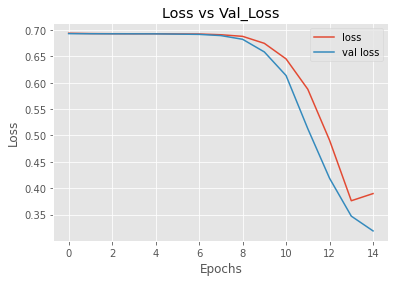

In [20]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title("Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Training Accuracy Vs Validation Accuracy curves

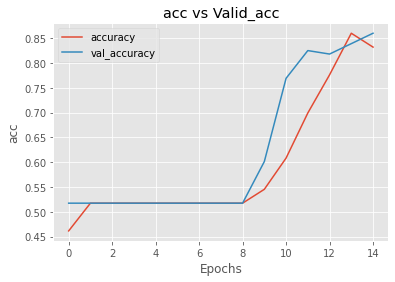

In [21]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title("acc vs Valid_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

In [22]:
valid_loss, valid_acc = model. evaluate(normalized_valid_ds)
print(valid_loss)
print(valid_acc)

training_loss, training_acc = model.evaluate(normalized_valid_ds)
print(training_loss)
print(training_acc)

5/5 [==============================] - 0s 93ms/step - loss: 0.3192 - accuracy: 0.8601
0.3192038834095001
0.8601398468017578
5/5 [==============================] - 0s 97ms/step - loss: 0.3192 - accuracy: 0.8601
0.3192039132118225
0.8601398468017578


Data Augmentation to reduce overfitting

In [23]:
data_augmentation = keras.Sequential(
    [
     layers.RandomFlip("horizontal",
                       input_shape=(100,
                                   100,
                                   3)),
     layers.RandomRotation(0.2),
     layers.RandomZoom(0.2),
     ]
)

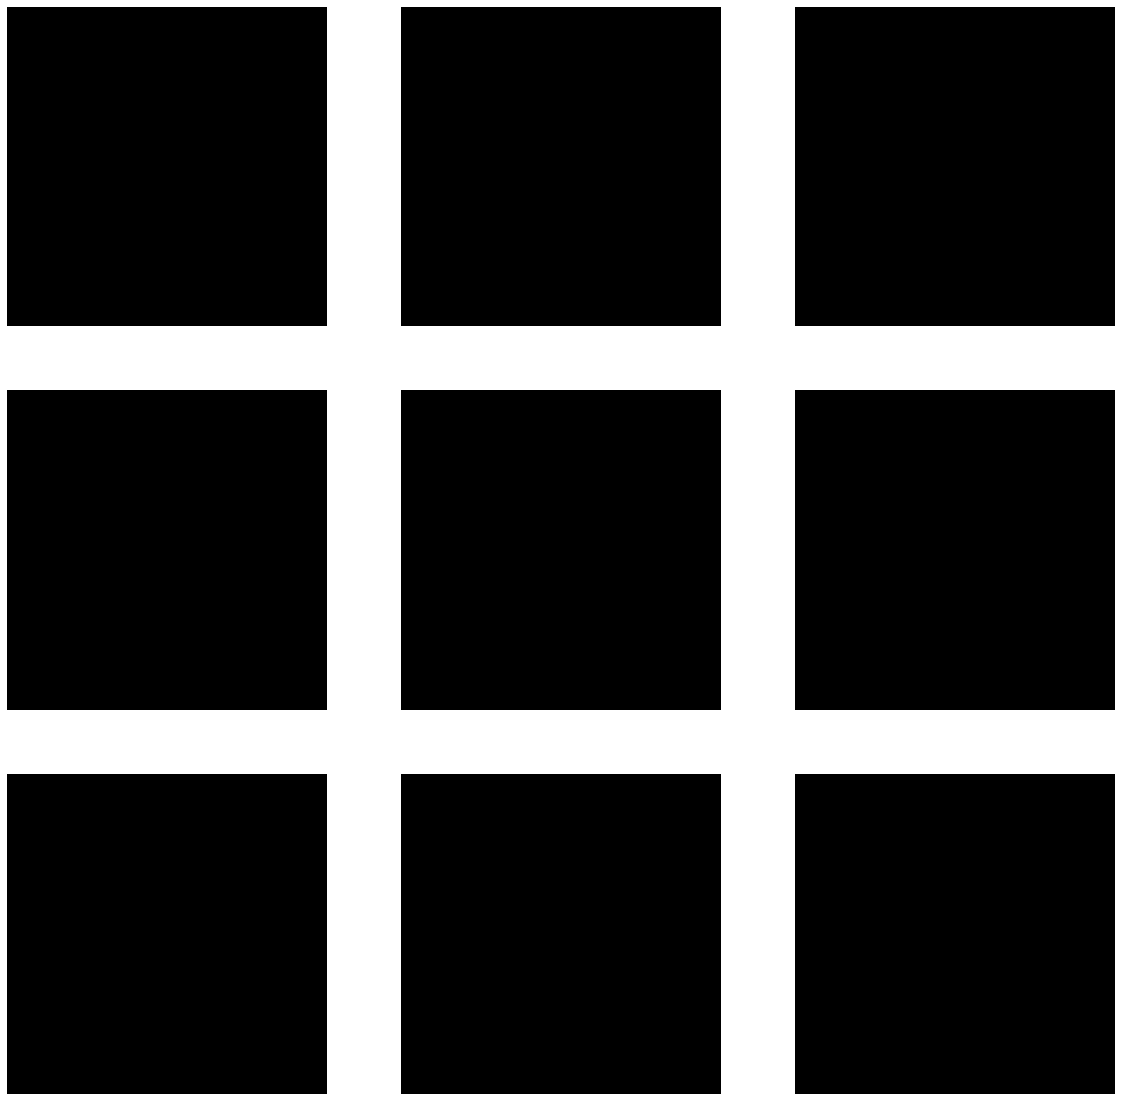

In [24]:
plt.figure(figsize=(20, 20))
for images, _ in normalized_train_ds.take(1):
  for i in range(9):
    augmented_images=data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

creating another model layer

In [25]:
num_classes = len(class_names)
model2 = tf.keras.Sequential([
    layers.Rescaling(1./255, input_shape=(100, 100, 3)),
    layers.Conv2D(16, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(num_classes)
])

compile the bmodel2

In [27]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model2 summary

In [28]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 25, 25, 64)       

Training the model 

In [29]:
epochs=15
history2 = model.fit(
normalized_valid_ds, 
validation_data =normalized_valid_ds,
epochs=epochs
)

Epoch 1/15
5/5 [==============================] - 2s 419ms/step - loss: 0.5241 - accuracy: 0.7622 - val_loss: 0.3663 - val_accuracy: 0.8392
Epoch 2/15
5/5 [==============================] - 2s 433ms/step - loss: 0.4546 - accuracy: 0.7972 - val_loss: 0.3754 - val_accuracy: 0.8182
Epoch 3/15
5/5 [==============================] - 2s 383ms/step - loss: 0.4442 - accuracy: 0.7832 - val_loss: 0.3742 - val_accuracy: 0.8252
Epoch 4/15
5/5 [==============================] - 2s 495ms/step - loss: 0.4082 - accuracy: 0.8112 - val_loss: 0.3797 - val_accuracy: 0.8112
Epoch 5/15
5/5 [==============================] - 3s 572ms/step - loss: 0.3820 - accuracy: 0.8252 - val_loss: 0.3751 - val_accuracy: 0.8392
Epoch 6/15
5/5 [==============================] - 2s 383ms/step - loss: 0.3538 - accuracy: 0.8531 - val_loss: 0.3602 - val_accuracy: 0.8322
Epoch 7/15
5/5 [==============================] - 2s 381ms/step - loss: 0.3390 - accuracy: 0.8531 - val_loss: 0.3327 - val_accuracy: 0.8531
Epoch 8/15
5/5 [====

Loss Vs validation Loss curve

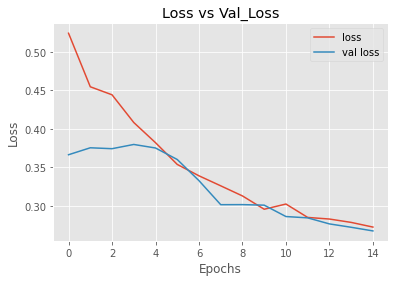

In [30]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(history2.history['loss'], label = 'loss')
plt.plot(history2.history['val_loss'], label='val loss')
plt.title("Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Accuracy Vs Validation Accuracy

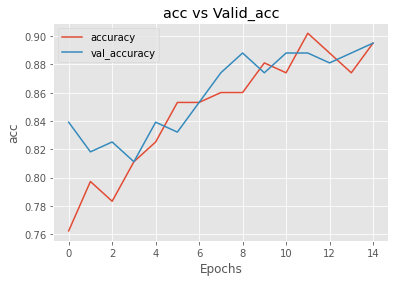

In [31]:
plt.plot(history2.history['accuracy'], label = 'accuracy')
plt.plot(history2.history['val_accuracy'], label='val_accuracy')
plt.title("acc vs Valid_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

Dropout technique for reducing overfiting

In [32]:
model3 = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(num_classes)
])

Compiling model3 where drop out hass beenn applied to reduce loss

In [33]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 100, 100, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                  

Training model3

In [35]:
epochs=10
history3 = model3.fit(
normalized_valid_ds, 
validation_data =normalized_valid_ds,
epochs=epochs
)

Epoch 1/10
5/5 [==============================] - 4s 492ms/step - loss: 0.6932 - accuracy: 0.4965 - val_loss: 0.6928 - val_accuracy: 0.5175
Epoch 2/10
5/5 [==============================] - 2s 429ms/step - loss: 0.6928 - accuracy: 0.5175 - val_loss: 0.6923 - val_accuracy: 0.5175
Epoch 3/10
5/5 [==============================] - 2s 430ms/step - loss: 0.6922 - accuracy: 0.5175 - val_loss: 0.6921 - val_accuracy: 0.5175
Epoch 4/10
5/5 [==============================] - 2s 434ms/step - loss: 0.6924 - accuracy: 0.5175 - val_loss: 0.6916 - val_accuracy: 0.5175
Epoch 5/10
5/5 [==============================] - 2s 425ms/step - loss: 0.6912 - accuracy: 0.5175 - val_loss: 0.6903 - val_accuracy: 0.5175
Epoch 6/10
5/5 [==============================] - 2s 428ms/step - loss: 0.6895 - accuracy: 0.5175 - val_loss: 0.6837 - val_accuracy: 0.5175
Epoch 7/10
5/5 [==============================] - 2s 427ms/step - loss: 0.6830 - accuracy: 0.5245 - val_loss: 0.6643 - val_accuracy: 0.5455
Epoch 8/10
5/5 [====

Loss Vs Validation Loss curves

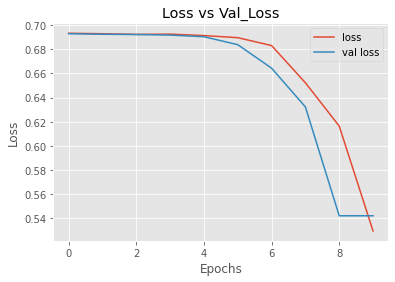

In [37]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(history3.history['loss'], label = 'loss')
plt.plot(history3.history['val_loss'], label='val loss')
plt.title("Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Accuracy Vs Validation Accuracy

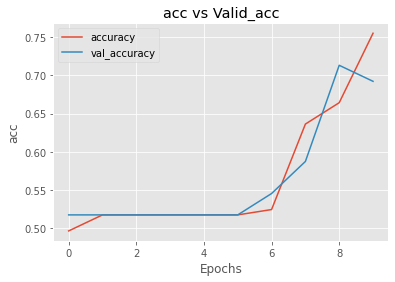

In [39]:
plt.plot(history3.history['accuracy'], label = 'accuracy')
plt.plot(history3.history['val_accuracy'], label='val_accuracy')
plt.title("acc vs Valid_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

Testing the model on a new dataset



1.          Testing on a known image

In [46]:
dataset_1 = "/content/drive/MyDrive/deep_learning_project/dataset1/normal/normal_0.png"

img = tf.keras.utils.load_img(dataset_1, target_size=(100, 100))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array,0)
predictions =model3.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence    and"
    .format(class_names[np.argmax(score)], 100*np.max(score))
)

print(training_acc)
print("training accuracy")

This image most likely belongs to normal with a 100.00 percent confidence    and
0.8601398468017578
training accuracy


Testing on unknown imageb  on data set 1

In [47]:
dataset_1 = "/content/drive/MyDrive/deep_learning_project/dataset1/unknown_images/45.png"

img = tf.keras.utils.load_img(dataset_1, target_size=(100, 100))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array,0)
predictions =model3.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence"
    .format(class_names[np.argmax(score)], 100*np.max(score))
)

This image most likely belongs to normal with a 100.00 percent confidence


In [49]:
dataset_1 = "/content/drive/MyDrive/deep_learning_project/dataset1/unknown_images/13.png"

img = tf.keras.utils.load_img(dataset_1, target_size=(100, 100))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array,0)
predictions =model3.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence"
    .format(class_names[np.argmax(score)], 100*np.max(score))
)

This image most likely belongs to normal with a 100.00 percent confidence


testing on unknown images of data set 2

In [51]:
dataset_1 = "/content/drive/MyDrive/deep_learning_project/dataset2/images/sick_eff21.png"

img = tf.keras.utils.load_img(dataset_1, target_size=(100, 100))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array,0)
predictions =model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence"
    .format(class_names[np.argmax(score)], 100*np.max(score))
)


This image most likely belongs to normal with a 100.00 percent confidence


model evaluation

Found 766 files belonging to 3 classes.
predictions:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1]
Labels:
 [2 0 0 0 1 0 0 1 2 0 1 0 0 1 0 2 0 1 2 1 0 1 1 0 0 0 0 1 0 0 0 2]


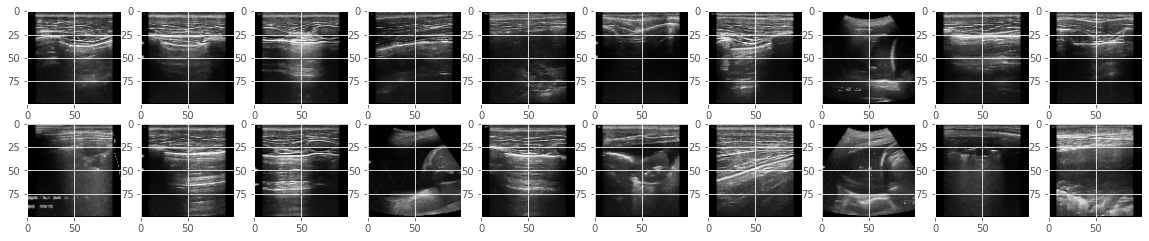

In [84]:
dataset_1 = "/content/drive/MyDrive/deep_learning_project/dataset1"
test_ds = tf.keras.utils.image_dataset_from_directory(dataset_1, image_size=(100, 100), batch_size=32)

image_batch, label_batch = test_ds.as_numpy_iterator().next()
predictions = model3.predict_on_batch(image_batch)

predictions = tf.math.argmax(predictions, 1)

print('predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(20, 10))
for i in range(20):
  ax = plt.subplot(5, 10, i+1)
  plt.imshow(image_batch[i].astype("uint8"))


In [85]:
dataset_2 = "/content/drive/MyDrive/deep_learning_project/dataset2"
test_ds2 = tf.keras.utils.image_dataset_from_directory(dataset_2, image_size=(100, 100), batch_size=32)



Found 224 files belonging to 1 classes.


In [86]:
AUTOTUNE = tf.data.AUTOTUNE

test_ds2 = test_ds2.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
valid_ds = valid_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [87]:

normalization_layer = layers.Rescaling(1./255)

In [88]:
normalized_ds2 = test_ds2.map(lambda x, y: (normalization_layer(x), y))
image_batch, label_batch = next(iter(normalized_ds2))
first_image = image_batch[3]

print(np.min(first_image), np.max(first_image))

0.0 0.9727448


In [89]:
normalized_ds2 = test_ds2.map(lambda x, y: (normalization_layer(x), y))
image_batch, label_batch = next(iter(normalized_ds2))
first_image = image_batch[3]

print(np.min(first_image), np.max(first_image))

0.0 0.96827596


predictions:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0]
Labels:
 [1 1 0 1 1 2 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 2]


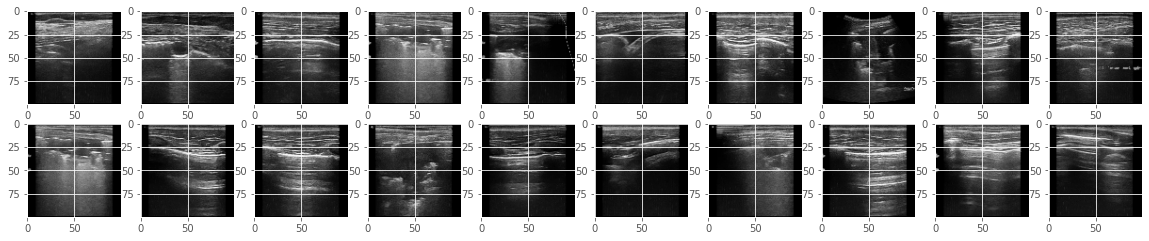

In [90]:
image_batch, label_batch = test_ds.as_numpy_iterator().next()
predictions = model3.predict_on_batch(image_batch)

predictions = tf.math.argmax(predictions, 1)

print('predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(20, 10))
for i in range(20):
  ax = plt.subplot(5, 10, i+1)
  plt.imshow(image_batch[i].astype("uint8"))

In [91]:

valid_loss, valid_acc = model. evaluate(valid_ds)
print(valid_loss)
print(valid_acc)

training_loss, training_acc = model.evaluate(valid_ds)
print(training_loss)
print(training_acc)

5/5 [==============================] - 1s 154ms/step - loss: 22.8403 - accuracy: 0.8741
22.840267181396484
0.8741258978843689
5/5 [==============================] - 1s 165ms/step - loss: 22.8403 - accuracy: 0.8741
22.840267181396484
0.8741258978843689


In [92]:
dataset_2 = "/content/drive/MyDrive/deep_learning_project/dataset2/images/sick_eif48.png"

img = tf.keras.utils.load_img(dataset_2, target_size=(100, 100))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array,0)
predictions =model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence"
    .format(class_names[np.argmax(score)], 100*np.max(score))
)


This image most likely belongs to normal with a 100.00 percent confidence


Printing the model results to a csv file

In [93]:
mport pandas as pd
import numpy as np
DF = pd.DataFrame(predictions)
DF.to_csv("image_results.csv")